In [2]:
!pip install pandas

  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cardekho/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [17]:
##checking how many unique values are prsent in categorical features
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [7]:
##checking null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
final_data = df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [11]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
##assigning a current year, to modify car age for better predictions
final_data['Current_Year'] = 2021
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [13]:
final_data['no_year'] = final_data['Current_Year'] - final_data['Year']
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [14]:
final_data.drop(['Year'], axis=1, inplace=True)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [15]:
final_data.drop(['Current_Year'], axis=1, inplace=True)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
##get dummies to convert categorical values to other vals using one hot encod
final_data = pd.get_dummies(final_data, drop_first=True)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [18]:
##correlation
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


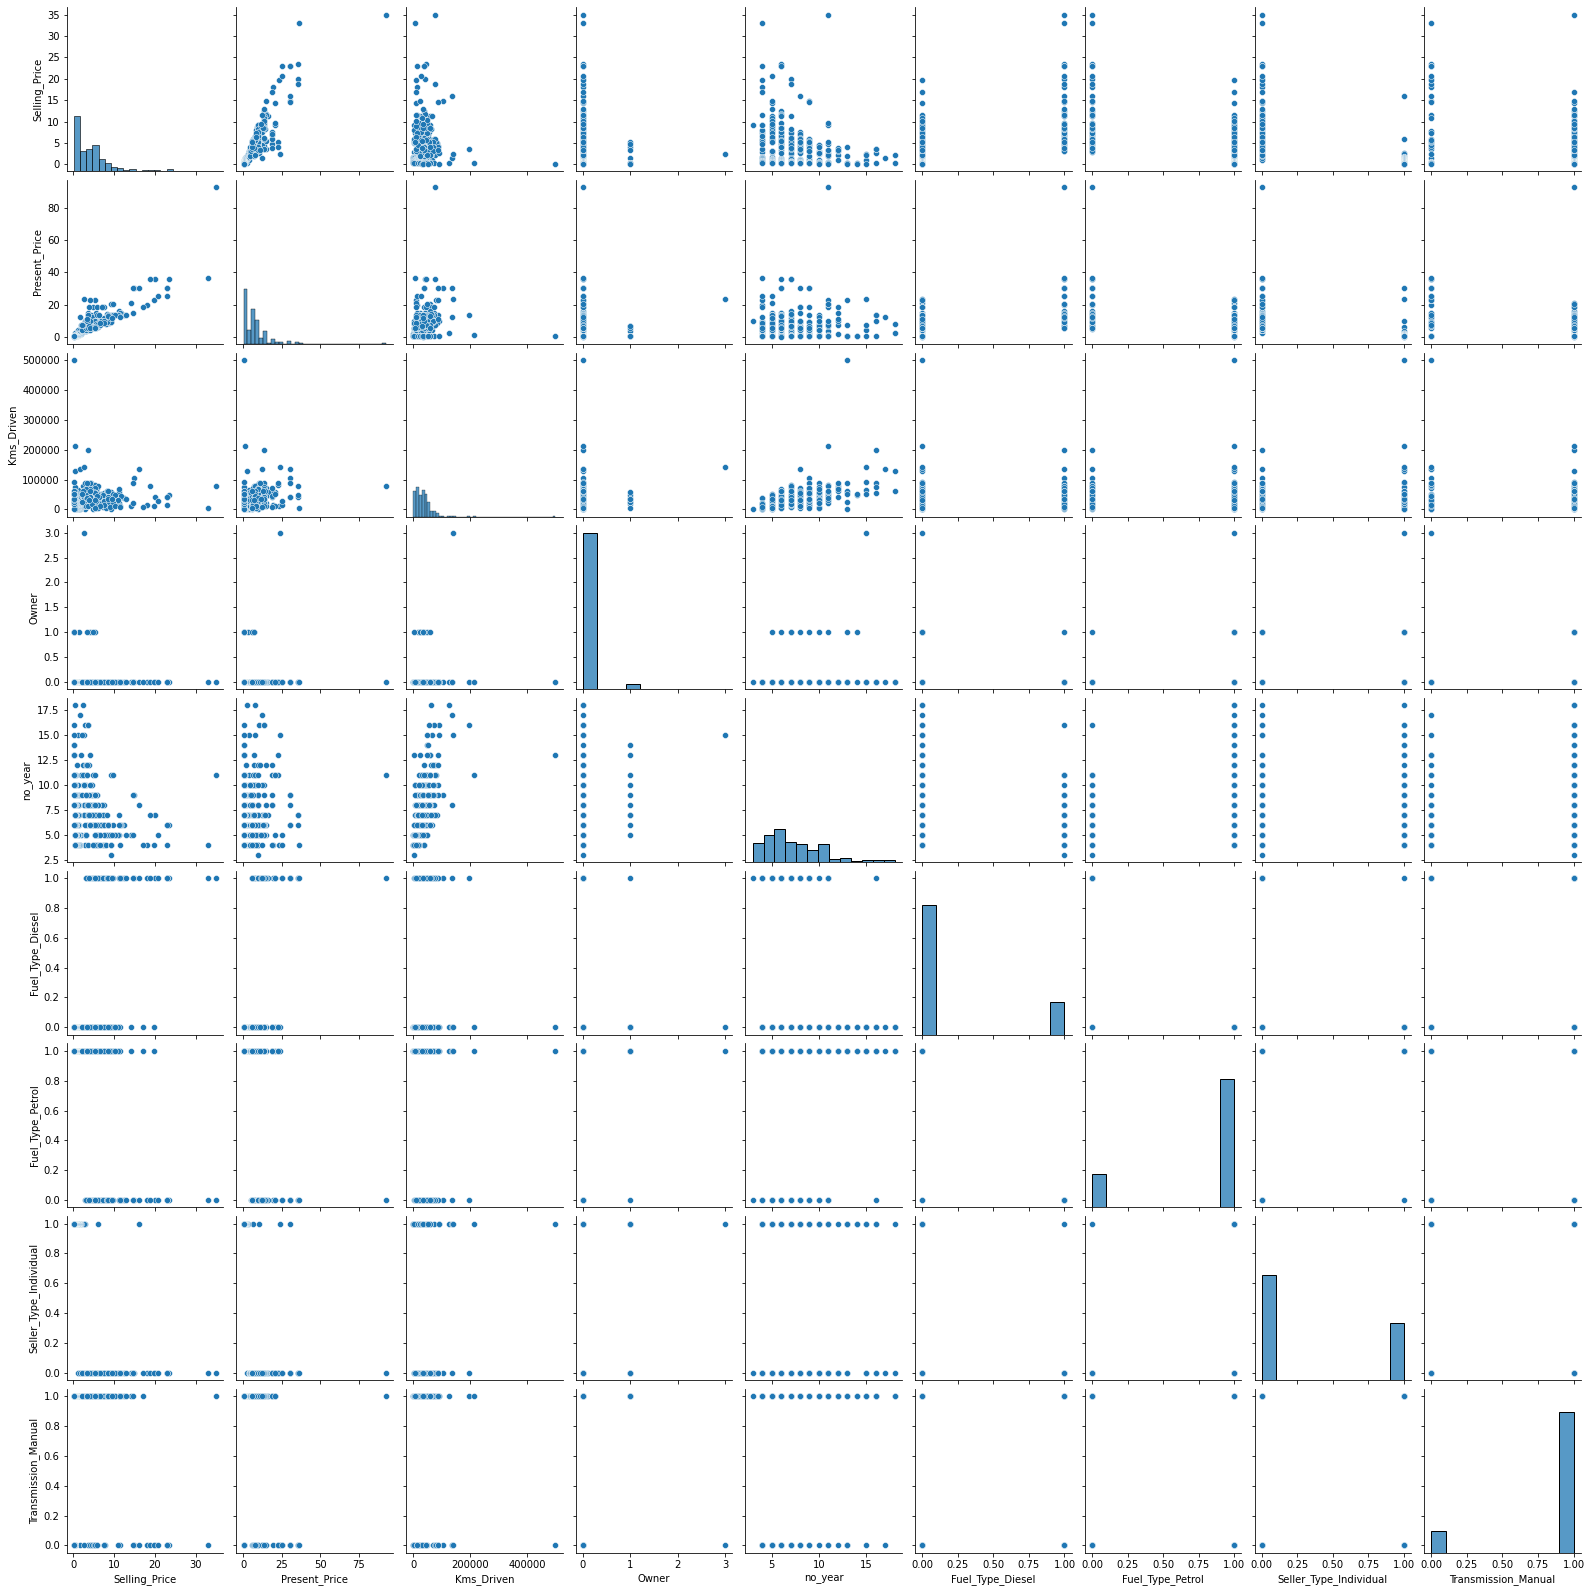

In [19]:
import seaborn as sns

sns.pairplot(final_data)

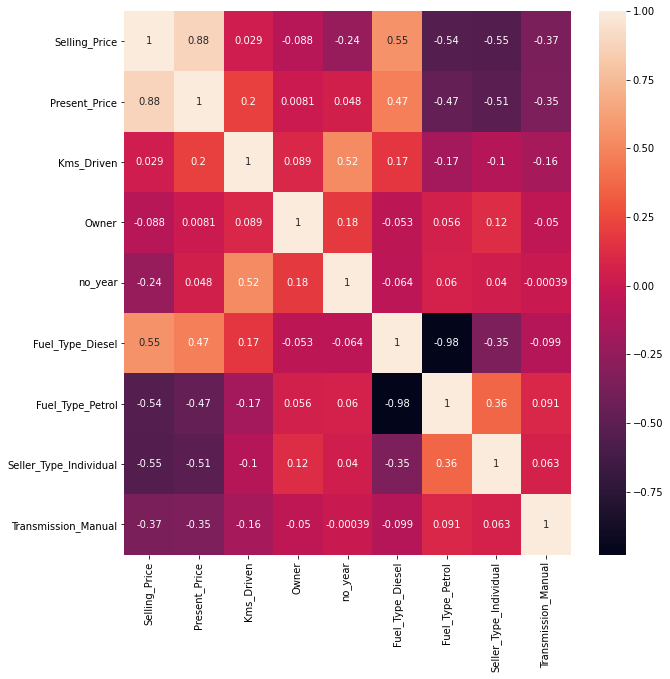

In [21]:
corrmat = final_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

sns.heatmap(final_data[top_corr_features].corr(), annot=True)
plt.show()

In [22]:
#independent and dependent features are taken
x = final_data.iloc[:,1:] #all cols except selling_price
y = final_data.iloc[:,0]

In [24]:
##feature importance using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.38679089 0.03894199 0.00045935 0.07887865 0.23358144 0.01244972
 0.11862722 0.13027074]


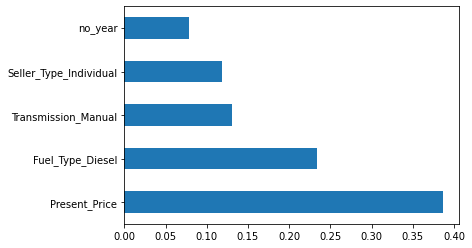

In [26]:
##plotting for better visualizations
imp_features = pd.Series(model.feature_importances_, index=x.columns)
imp_features.nlargest(5).plot(kind='barh')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=44)

In [28]:
xtrain.shape

(240, 8)

In [31]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rfr = RandomForestRegressor()

## Hyperparameters tuning
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

max_features = ['auto', 'sqrt']

## max levels in a tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

## samples required to split a node
min_samples_split = [2,5,10,15,100]

#min samples at each leaf node
min_samples_leaf = [1,2,5,10]

In [32]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
    }

In [35]:
rf_random = RandomizedSearchCV( estimator=rfr, param_distributions = random_grid,
                              scoring='neg_mean_squared_error', n_iter=10, cv=7,
                              verbose=2, random_state=44, n_jobs = 1)


In [36]:
rf_random.fit(xtrain,ytrain)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=60

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   0.4s


RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=44, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:
preds = rf_random.predict(xtest)
print(preds)

[ 0.55049966  1.3422349   3.50686179  4.54060902  1.88596098  7.37795286
  5.51035974  8.96883397  5.40072636  4.82551587  0.53446687  2.48515108
  5.48905704  5.63849751  5.54672691  6.38112319  0.57761432  2.75686423
  7.59152745  5.68063149  0.56745383 13.27977744  1.08330278  5.71614505
  0.3519683   0.3519683   4.96775529  4.73495586  0.85896507  2.74703762
  0.32205827  5.1247614   1.14613314 10.27803607  1.14531842  4.96775529
  0.35416413  4.34605861  6.85937744  0.35416413  3.58057594  2.70692974
  4.6968671   1.14925907  7.89993661  4.85726303  1.1465227   4.7141171
  4.10630189  7.11562397  4.71410446 13.56597587  3.79972165  0.3082294
  4.13692852  0.34384688  6.16810597  6.99681042  0.32136895  0.31159652
  4.11846666]


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

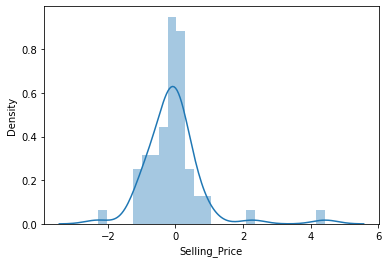

In [40]:
sns.distplot(ytest-preds)

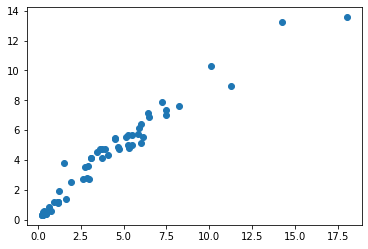

In [41]:
## using scatter we can check if the model has performed better or not, if the plots
## are linear, then it is a good performance
plt.scatter(ytest,preds)

In [43]:
import pickle

file = open('cardekho/random_forest_regressor_model.pkl','wb')
pickle.dump(rf_random, file)